In [103]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read, write
from dynasor.qpoints import get_spherical_qpoints
from dynasor import compute_static_structure_factors, Trajectory
from dynasor.post_processing import get_spherically_averaged_sample_smearing 

In [105]:
import os 
xlim = [0.9, 3]
ylim = [0.0005, 4]
alpha = 0.8

# parameters
q_max = 3.0
q_linspace = np.linspace(0, q_max, 1000)
q_width = 0.1

q_list = []
Sq_list = []  

for temp in np.arange(850,950,10):
    if temp < 890:
        dirname = f'/Users/prakriti/2024_BaZrS3_Phase_Transitions/XRD/BaZrS3_I4mcm_size4_T{temp}_seekpath/'
    else:
        dirname = f'/Users/prakriti/2024_BaZrS3_Phase_Transitions/XRD/BaZrS3_Pm-3m_size10_T{temp}_seekpath/'
    if not os.path.exists(f'{dirname}/dump.extxyz'):
        os.chdir(f'{dirname}')
        print("here")
        os.system('mv dump.xyz dump.extxyz')
    traj = Trajectory(dirname + 'dump.extxyz', trajectory_format='extxyz')

    # generate all q-points in supercell
    q_points = get_spherical_qpoints(traj.cell, q_max=q_max)
    
    # compute Sq
    sample = compute_static_structure_factors(traj, q_points)
    
    # spherical average over q-points
    data_dict_qwidths = dict()
    for q_width in [0.003]:
    
        sample_averaged = get_spherically_averaged_sample_smearing(sample, q_norms=q_linspace, q_width=q_width)
        data_dict_qwidths[q_width] = sample_averaged.q_norms, sample_averaged.Sq
  
    for q_width, (q, Sq) in data_dict_qwidths.items():
        print(q, type(q), q.shape, "q")
        print(Sq, type(Sq), Sq.shape, "Sq")
        q_list.append(q)
        Sq_list.append(Sq)

print(q_list)
print(Sq_list)


INFO: Trajectory file: /Users/prakriti/2024_BaZrS3_Phase_Transitions/XRD/BaZrS3_I4mcm_size4_T850_seekpath/dump.extxyz
INFO: Total number of particles: 5120
INFO: Number of atom types: 1
INFO: Number of atoms of type X: 5120
INFO: Simulation cell (in Angstrom):
[[57.24321071  0.          0.        ]
 [ 0.         57.24321071  0.        ]
 [ 0.          0.         40.62623042]]
INFO: Number of q-points: 8334
[0.         0.003003   0.00600601 0.00900901 0.01201201 0.01501502
 0.01801802 0.02102102 0.02402402 0.02702703 0.03003003 0.03303303
 0.03603604 0.03903904 0.04204204 0.04504505 0.04804805 0.05105105
 0.05405405 0.05705706 0.06006006 0.06306306 0.06606607 0.06906907
 0.07207207 0.07507508 0.07807808 0.08108108 0.08408408 0.08708709
 0.09009009 0.09309309 0.0960961  0.0990991  0.1021021  0.10510511
 0.10810811 0.11111111 0.11411411 0.11711712 0.12012012 0.12312312
 0.12612613 0.12912913 0.13213213 0.13513514 0.13813814 0.14114114
 0.14414414 0.14714715 0.15015015 0.15315315 0.1561561

In [110]:
data_dict_qwidths

{0.003: (array([0.        , 0.003003  , 0.00600601, 0.00900901, 0.01201201,
         0.01501502, 0.01801802, 0.02102102, 0.02402402, 0.02702703,
         0.03003003, 0.03303303, 0.03603604, 0.03903904, 0.04204204,
         0.04504505, 0.04804805, 0.05105105, 0.05405405, 0.05705706,
         0.06006006, 0.06306306, 0.06606607, 0.06906907, 0.07207207,
         0.07507508, 0.07807808, 0.08108108, 0.08408408, 0.08708709,
         0.09009009, 0.09309309, 0.0960961 , 0.0990991 , 0.1021021 ,
         0.10510511, 0.10810811, 0.11111111, 0.11411411, 0.11711712,
         0.12012012, 0.12312312, 0.12612613, 0.12912913, 0.13213213,
         0.13513514, 0.13813814, 0.14114114, 0.14414414, 0.14714715,
         0.15015015, 0.15315315, 0.15615616, 0.15915916, 0.16216216,
         0.16516517, 0.16816817, 0.17117117, 0.17417417, 0.17717718,
         0.18018018, 0.18318318, 0.18618619, 0.18918919, 0.19219219,
         0.1951952 , 0.1981982 , 0.2012012 , 0.2042042 , 0.20720721,
         0.21021021, 0.2132

In [ ]:
q_array = np.array(q_list)
Sq_array = np.array(Sq_list)
import pandas as pd 
df = pd.DataFrame(Sq_array.T[0,:,:])
print(df.shape)
df
l =[]
for temp in np.arange(850,950,10):
    l.append(f'{temp}')
print(l) 
df.columns = l


(1000, 20)
['850', '855', '860', '865', '870', '875', '880', '885', '890', '895', '900', '905', '910', '915', '920', '925', '930', '935', '940', '945']


In [106]:
T = l
T = np.array(T)
T.shape

(20,)

In [107]:
q_array[0].shape

(1000,)

In [108]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
850,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,...,0.277084,0.290300,0.304858,0.308679,0.305998,0.306054,0.296048,0.286369,0.283169,0.283196
855,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,...,0.278307,0.293619,0.308742,0.313865,0.310936,0.309865,0.300040,0.291322,0.287874,0.286396
860,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,...,0.280297,0.298187,0.311424,0.312594,0.307626,0.305917,0.293454,0.284879,0.282521,0.281164
865,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,...,0.285715,0.307222,0.321757,0.321128,0.312459,0.307924,0.295579,0.289169,0.288896,0.291188
870,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,...,0.298141,0.318442,0.329225,0.325695,0.317940,0.311122,0.297201,0.291265,0.288735,0.288329
875,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,...,0.306908,0.321104,0.326000,0.320169,0.314632,0.310912,0.301142,0.294865,0.289146,0.283376
880,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,...,0.311032,0.320706,0.324703,0.322063,0.317209,0.308633,0.301203,0.299338,0.296226,0.292625
885,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,...,0.328783,0.335388,0.333959,0.323890,0.315593,0.306279,0.303413,0.304052,0.300295,0.293585
890,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,...,0.325158,0.329919,0.331852,0.329491,0.322530,0.306153,0.297226,0.296471,0.294270,0.290332
895,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,5120.0,...,0.326214,0.330698,0.330644,0.324151,0.316525,0.305112,0.300270,0.299346,0.296550,0.292707


['850' '855' '860' '865' '870' '875' '880' '885' '890' '895' '900' '905'
 '910' '915' '920' '925' '930' '935' '940' '945']


/var/folders/z6/b_jzphk53190vbrxr2tb1l980000gn/T/ipykernel_13663/3115337060.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  orig_map=plt.cm.get_cmap('inferno')


Text(0, 0.5, 'q (Ā)')

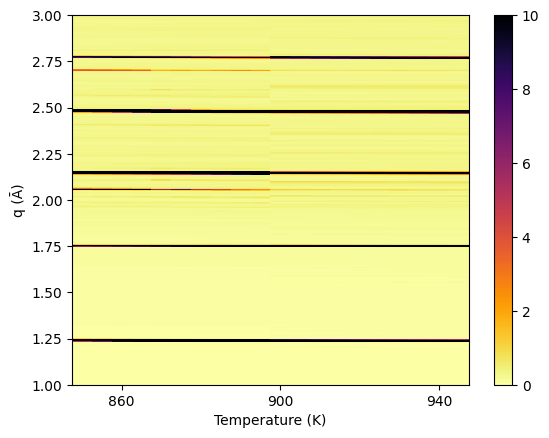

In [109]:
#plt.pcolormesh(q_array[0], T ,df.T)
print(T)
orig_map=plt.cm.get_cmap('inferno') 
reversed_map = orig_map.reversed() 
plt.pcolormesh(T,q_array[0],df,cmap=reversed_map)
plt.ylim([1,3])
#plt.xlim([880,940])
plt.xticks(['860','900','940'])
plt.colorbar()
plt.clim([0,10])
plt.xlabel("Temperature (K)")
plt.ylabel("q (Ā)")

In [22]:
os.system('pwd')
os.chdir('../')

/Users/prakriti/2024_BaZrS3_Phase_Transitions/XRD/BaZrS3_Pm-3m_size10_T940_seekpath


In [100]:
structure_tags = ['BaZrS3_Pm-3m_size1_T1000_seekpath','BaZrS3_I4mcm_size1_T700_seekpath','BaZrS3_I4mcm_size1_T800_seekpath','BaZrS3_Pm-3m_size1_T900_seekpath']
structure_tags = ['BaZrS3_I4mcm_size1_T800_seekpath','BaZrS3_Pm-3m_size1_T900_seekpath']
structure_tags = ['/Users/prakriti/2024_BaZrS3_Phase_Transitions/BaZrS3-spg140-I4mcm', '/Users/prakriti/2024_BaZrS3_Phase_Transitions/BaZrS3-spg221-Pm3m']
data_dict = dict()
for structure_tag in structure_tags:

    # write dummy traj
    atoms = read(f'{structure_tag}.xyz')
    atoms.calc = None
    n_atoms = len(atoms)
    traj = [atoms for _ in range(2)]
    write('tmp_traj.xyz', traj)

    # setup traj
    traj = Trajectory('tmp_traj.xyz', trajectory_format='extxyz', atomic_indices="read_from_trajectory")

    # q-points (dynasor)
    q_max = 5.0
    q_points = get_spherical_qpoints(traj.cell, q_max=q_max)
    q_norms = np.linalg.norm(q_points, axis=1)
    print(q_max, np.sum(q_norms < 2.5))

    # q-points (correct)
    atoms = read('model.xyz')
    q_points = []
    q_int_max = 16
    for i in range(-q_int_max, q_int_max+1, 1):
        for j in range(-q_int_max, q_int_max+1, 1):
            for k in range(-q_int_max, q_int_max+1, 1):
                qpt = 2*np.pi*np.array([i, j, k]) @ atoms.cell.reciprocal()[:]
                q_points.append(qpt)
    q_points = np.array(q_points)
    q_norms = np.linalg.norm(q_points, axis=1)

    # compute Sq
    sample = compute_static_structure_factors(traj, q_points)

    # q-points
    #q_max = 3.0
    #q_points = get_spherical_qpoints(traj.cell, q_max=q_max)

    # compute Sq
    #sample = compute_static_structure_factors(traj, q_points)
    q_norms = np.linalg.norm(sample.q_points, axis=1)
    data_dict[structure_tag] = q_norms, sample.Sq / n_atoms

INFO: Trajectory file: tmp_traj.xyz
INFO: Total number of particles: 10
INFO: Number of atom types: 3
INFO: Number of atoms of type Ba: 2
INFO: Number of atoms of type S: 6
INFO: Number of atoms of type Zr: 2
INFO: Simulation cell (in Angstrom):
[[-3.46814503  3.46814517  5.09857675]
 [ 3.46814513 -3.46814507  5.09857675]
 [ 3.46814507  3.46814503 -5.09857682]]
5.0 9
INFO: Number of q-points: 35937
INFO: Trajectory file: tmp_traj.xyz
INFO: Total number of particles: 5
INFO: Number of atom types: 3
INFO: Number of atoms of type Ba: 1
INFO: Number of atoms of type S: 3
INFO: Number of atoms of type Zr: 1
INFO: Simulation cell (in Angstrom):
[[5.01430005 0.         0.        ]
 [0.         5.01430005 0.        ]
 [0.         0.         5.01430005]]
5.0 8
INFO: Number of q-points: 35937


KeyboardInterrupt: 

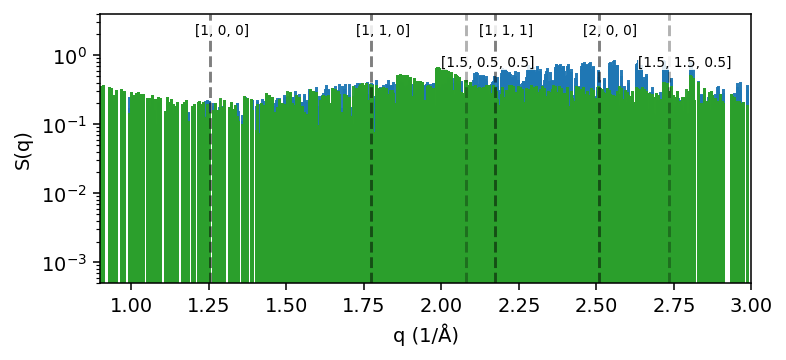

In [101]:
# plot setup
fig = plt.figure(figsize=(6.0, 2.5), dpi=140)
ax1 = fig.add_subplot()

colors = dict()
#colors['BaZrS3_I4mcm_size1_T800_seekpath'] = 'tab:green'
#colors['BaZrS3_Pm-3m_size1_T900_seekpath'] = 'tab:blue'
colors['/Users/prakriti/2024_BaZrS3_Phase_Transitions/BaZrS3-spg140-I4mcm'] = 'tab:blue'
colors['/Users/prakriti/2024_BaZrS3_Phase_Transitions/BaZrS3-spg221-Pm3m'] = 'tab:green'

labels = dict()
#labels['BaZrS3_Pm-3m_size1_T900_seekpath'] = r'Pm-3m'
#labels['BaZrS3_I4mcm_size1_T800_seekpath'] = r'I4/mcm'

xlim = [0.9, 3.0]
ylim = [0.0005, 4]
alpha = 0.8


# plot S(q) as vertical lines
for structure_tag, (q_norms, Sq) in data_dict.items():
    for q, S in zip(q_norms, Sq):
        ax1.plot([q, q], [0, S[0]], color=colors[structure_tag], alpha=alpha)
        #ax1.plot([q, q], [0, S[0]])
    #ax1.plot(np.nan, np.nan, color=colors[structure_tag], alpha=alpha, label=labels[structure_tag])


# Mark the cubic gamma-points
alat = 5.01
alpha = 0.5
fs = 7
bbox = dict(facecolor='w', edgecolor='none', alpha=0.85, pad=0.0)

q_vecs = [[1, 0, 0], [1, 1, 0], [1, 1, 1], [2, 0, 0]]
for qvec in q_vecs:
    q = 2 * np.pi / alat * np.linalg.norm(qvec)
    ax1.axvline(x=q, ls='--', color='k', alpha=alpha)
    ax1.text(q -0.05, 0.5 * ylim[-1], str(qvec), fontsize=fs, bbox=bbox)

# Mark the cubic M-
#qvec_M1 = [1.5, 0.5, 0]
#qvec_M2 = [1.5, 0.5, 1.0]
qvec_M1 = [1.5, 0.5, 0.5]
qvec_M2 = [1.5, 1.5, 0.5]
q_M1 = 2 * np.pi / alat * np.linalg.norm(qvec_M1)
q_M2 = 2 * np.pi / alat * np.linalg.norm(qvec_M2)
ax1.axvline(x=q_M1, ls='--', color='k', alpha=alpha-0.2)
ax1.axvline(x=q_M2, ls='--', color='k', alpha=alpha-0.2)
ax1.text(q_M1-0.08, 0.17 * ylim[-1], str(qvec_M1), fontsize=fs, bbox=bbox)
ax1.text(q_M2-0.1, 0.17 * ylim[-1], str(qvec_M2), fontsize=fs, bbox=bbox)


ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_yscale('log')
#ax1.legend(loc=1, fontsize=8, bbox_to_anchor=(0.4, 0.84))
ax1.set_xlabel('q (1/Å)')
ax1.set_ylabel('S(q)')

fig.tight_layout()